This project based on Exploratory data analysis and Regression model for the prediction of future product prices.
The project is divided into 4 parts as below:
1. Exploratory Data Analysis
2. Data Processing for Machine Learning
3. Model Building
4. Model Evaluation and Analysis

# Importing the Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
sns.set(
    rc={ "figure.figsize": (10,8) },
    style="ticks", context="notebook", font_scale=1.2
)

In [4]:
adverts = pd.read_csv('C:/Users/Akshaya/Documents/jupyterbooks/Machine Learning/Assignment/adverts.csv')
adverts.head()

## 1. Exploratory Data Analysis (EDA)

### 1.1. Meaning and Type of Features; Analysis of Univariate Distributions (3-4)
### 1.1.1 sample observation, Identifying quantitative and qualitative features

In [ ]:
# Lets see some basic stats of the data
adverts.describe().astype("int64")

,public_reference,mileage,year_of_registration,price
count,402005,401878,368694,402005
mean,202007077472447,37743,2015,17341
std,16916615997,34831,7,46437
min,201307177852187,0,999,120
25%,202009023197699,10481,2013,7495
50%,202009304400624,28629,2016,12600
75%,202010175124399,56875,2018,20000
max,202011025683478,999999,2020,9999999


In [7]:
# Apart from the data stats we can see a columns wise summary by simply using the info(). This helps in identifying the missing values and the datatypes of the columns
adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


The column level info shows some missing values in the data. Hence lets see the number of missing values in the data.

In [8]:
adverts.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

The dataset consist of 11 columns and 402005 rows. The price is the target column. The model is being build to predict the price given the features. The mileage column is the only quantitative feature in the dataset. Others are categorical features. The mileage, reg_code, standard_colour, year_of_registration, body_type and fuel_type has null values to be dealth with.

### 1.1.2 Analysis of distribution, parsing data and group analysis

### Analysis of price

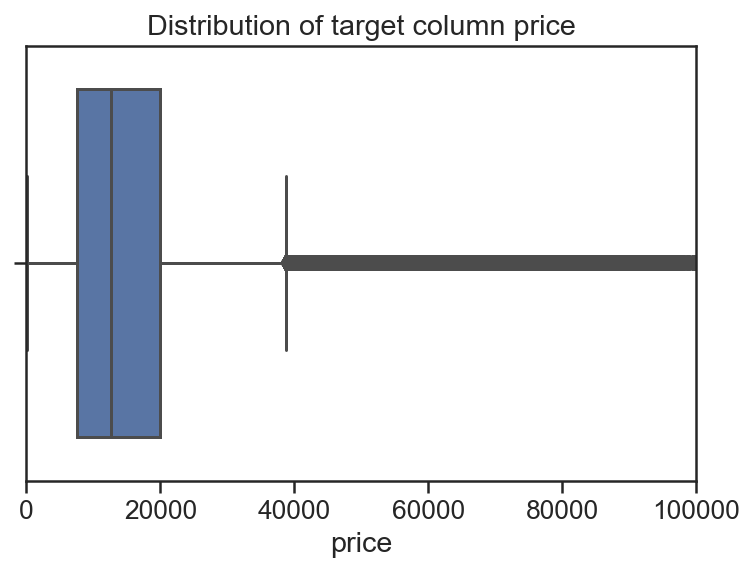

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=adverts['price']).set_xlim(0,100000)
plt.title('Distribution of target column price')
plt.show()

The price column which is our target has values ranging from 120 to 9999999. The boxplot says the outlier starts from the 40000 price. The maximum sales has happened between 10000 to 20000 range. But removing this outliers means the data of luxurious cars will be removed. Hence our model will be unaware of the luxurious cars and the prediction for luxurios cars will be wrong. Its better to deal with them seperately.

### Vehicle_condition
Lets see how this column affects the overall data and the price variations

In [10]:
adverts.groupby('vehicle_condition')['price'].sum()

vehicle_condition
NEW     1026411915
USED    5945145046
Name: price, dtype: int64

In [11]:
(adverts.query('vehicle_condition == "NEW"')['price'].sum()) / adverts['price'].sum()

0.14722850587636474

In [12]:
adverts.query('vehicle_condition == "NEW"')['year_of_registration'].unique()

array([nan])

The used vehicle is several times more than the New vehicles, same in the case of the price. But 31249 new cars contributes to 14.72% of the price. There is no year_of_registration for the new cars.

### year_of_registration

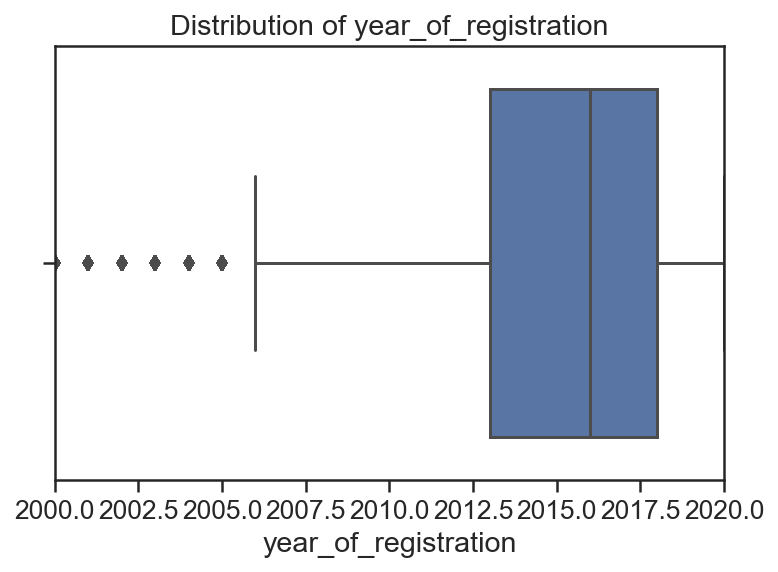

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=adverts['year_of_registration']).set_xlim(2000,2020)
plt.title('Distribution of year_of_registration')
plt.show()

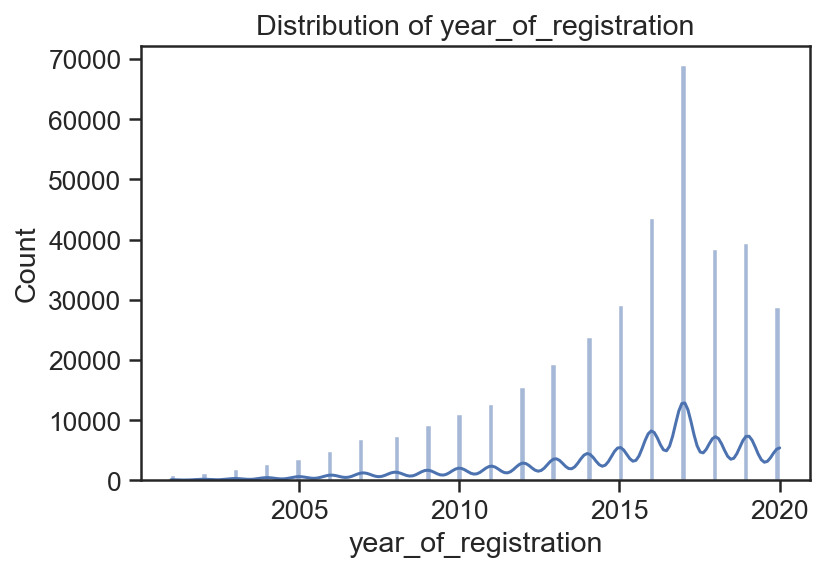

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data = adverts.query('year_of_registration > 2000'), x='year_of_registration', kde = True)
plt.title('Distribution of year_of_registration')
plt.show()

In [15]:
len(adverts.query('year_of_registration == 2017'))

68790

The year_of_registration column consist of the year at the which car was sold. The minimum year is 999 and maximum year is 2020 in the raw data. The boxplot indicates the outlier starts from year previous than 2006. There are noise year as well such as years previous than 1800s as cars was not available on market for those days. the peak sales of cars has occured in the year 2017 which is 68790 cars.

### Mileage

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


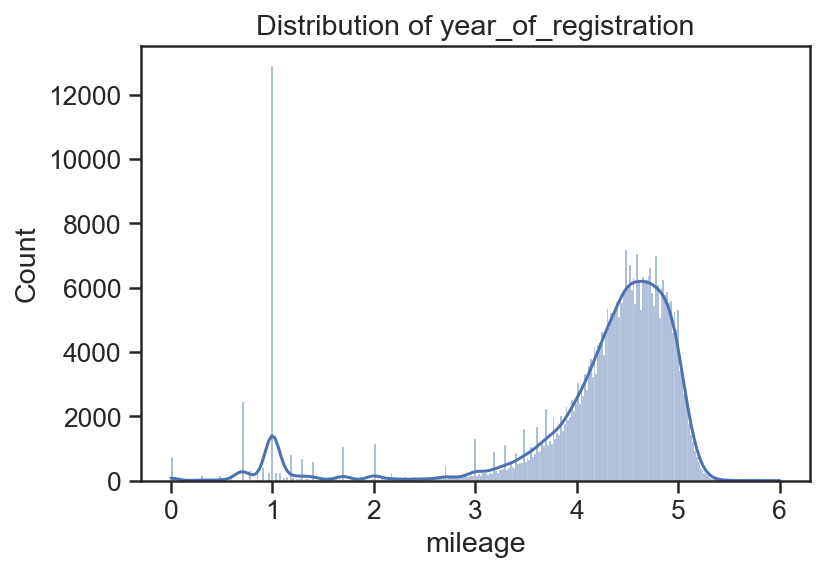

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data=adverts, x=np.log10(adverts['mileage']), kde=True)
plt.title('Distribution of year_of_registration')
plt.show()

The maximum mileage falls between the range of 40000 to 50000. There is a small peak at 10000 mileage.

### 1.2. Analysis of Predictive Power of Features (2-3)

### 1.2.1 Price correlation check

In [17]:
adv1 = adverts.query('price < 40000 & year_of_registration > 2000 ')
adv1.corr()

,public_reference,mileage,year_of_registration,price,crossover_car_and_van
public_reference,1.000000,0.020386,-0.000302,-0.047643,-0.024358
mileage,0.020386,1.000000,-0.742879,-0.517514,0.035071
year_of_registration,-0.000302,-0.742879,1.000000,0.601460,-0.010622
price,-0.047643,-0.517514,0.601460,1.000000,0.046782
crossover_car_and_van,-0.024358,0.035071,-0.010622,0.046782,1.000000


The price and mileage shows an inverse correlation. year_of_registration and price shows a direct correlation. mileage and year_of_registration also show a strong inverse correlation.

### Price Vs Mileage

(0.0, 40000.0)

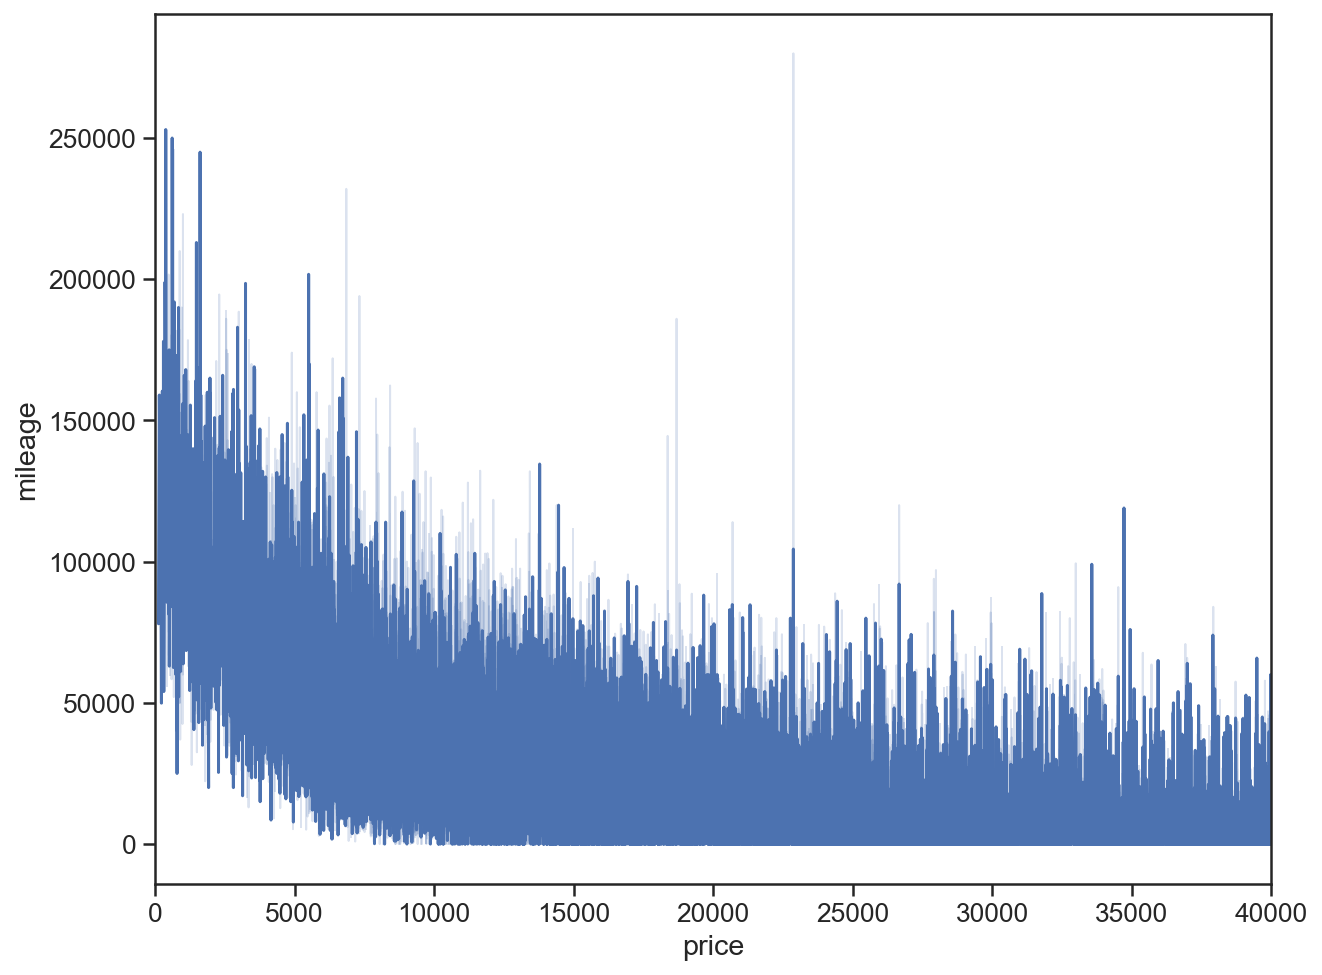

In [18]:
sns.lineplot(data=adverts, x='price', y='mileage').set_xlim(0,40000)

The graph between mileage and price shows an inverse relation. As the mileage increases the price decreases which matches to the real world observations as well

### Price Vs Year_of_registration

(0.0, 10000.0)

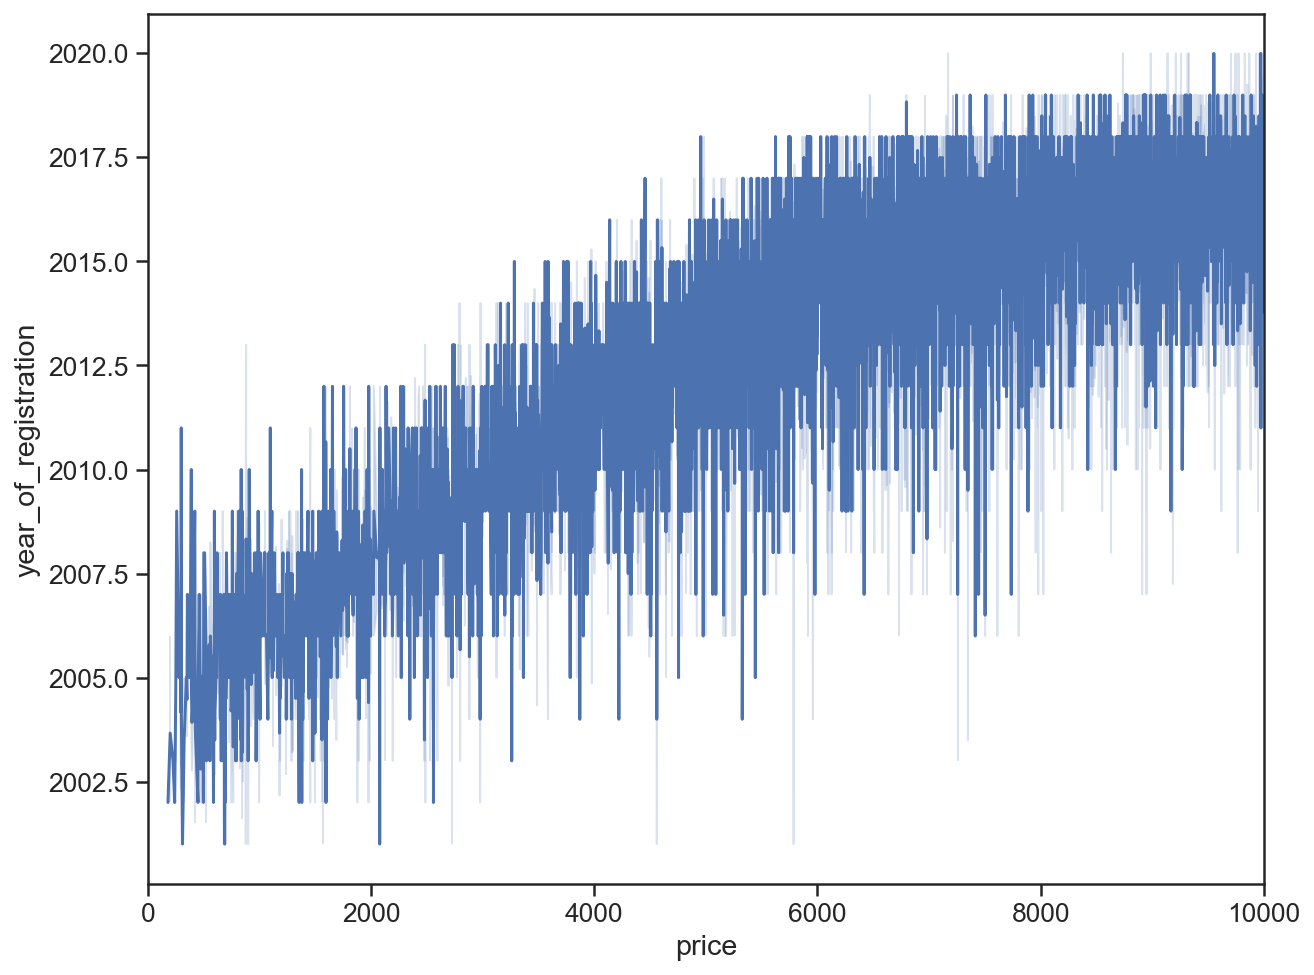

In [19]:
sns.lineplot(data=adverts.query('year_of_registration>2000'), x='price', y='year_of_registration').set_xlim(0,10000)

The year_of_registration Vs price graph proves the correlation. As the year_of_registration becomes more closer to the recent year the car gains a higher price.

### Price Vs year_of_registration trend for standard_make

In [20]:
adverts['standard_make'].value_counts()

BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: standard_make, Length: 110, dtype: int64

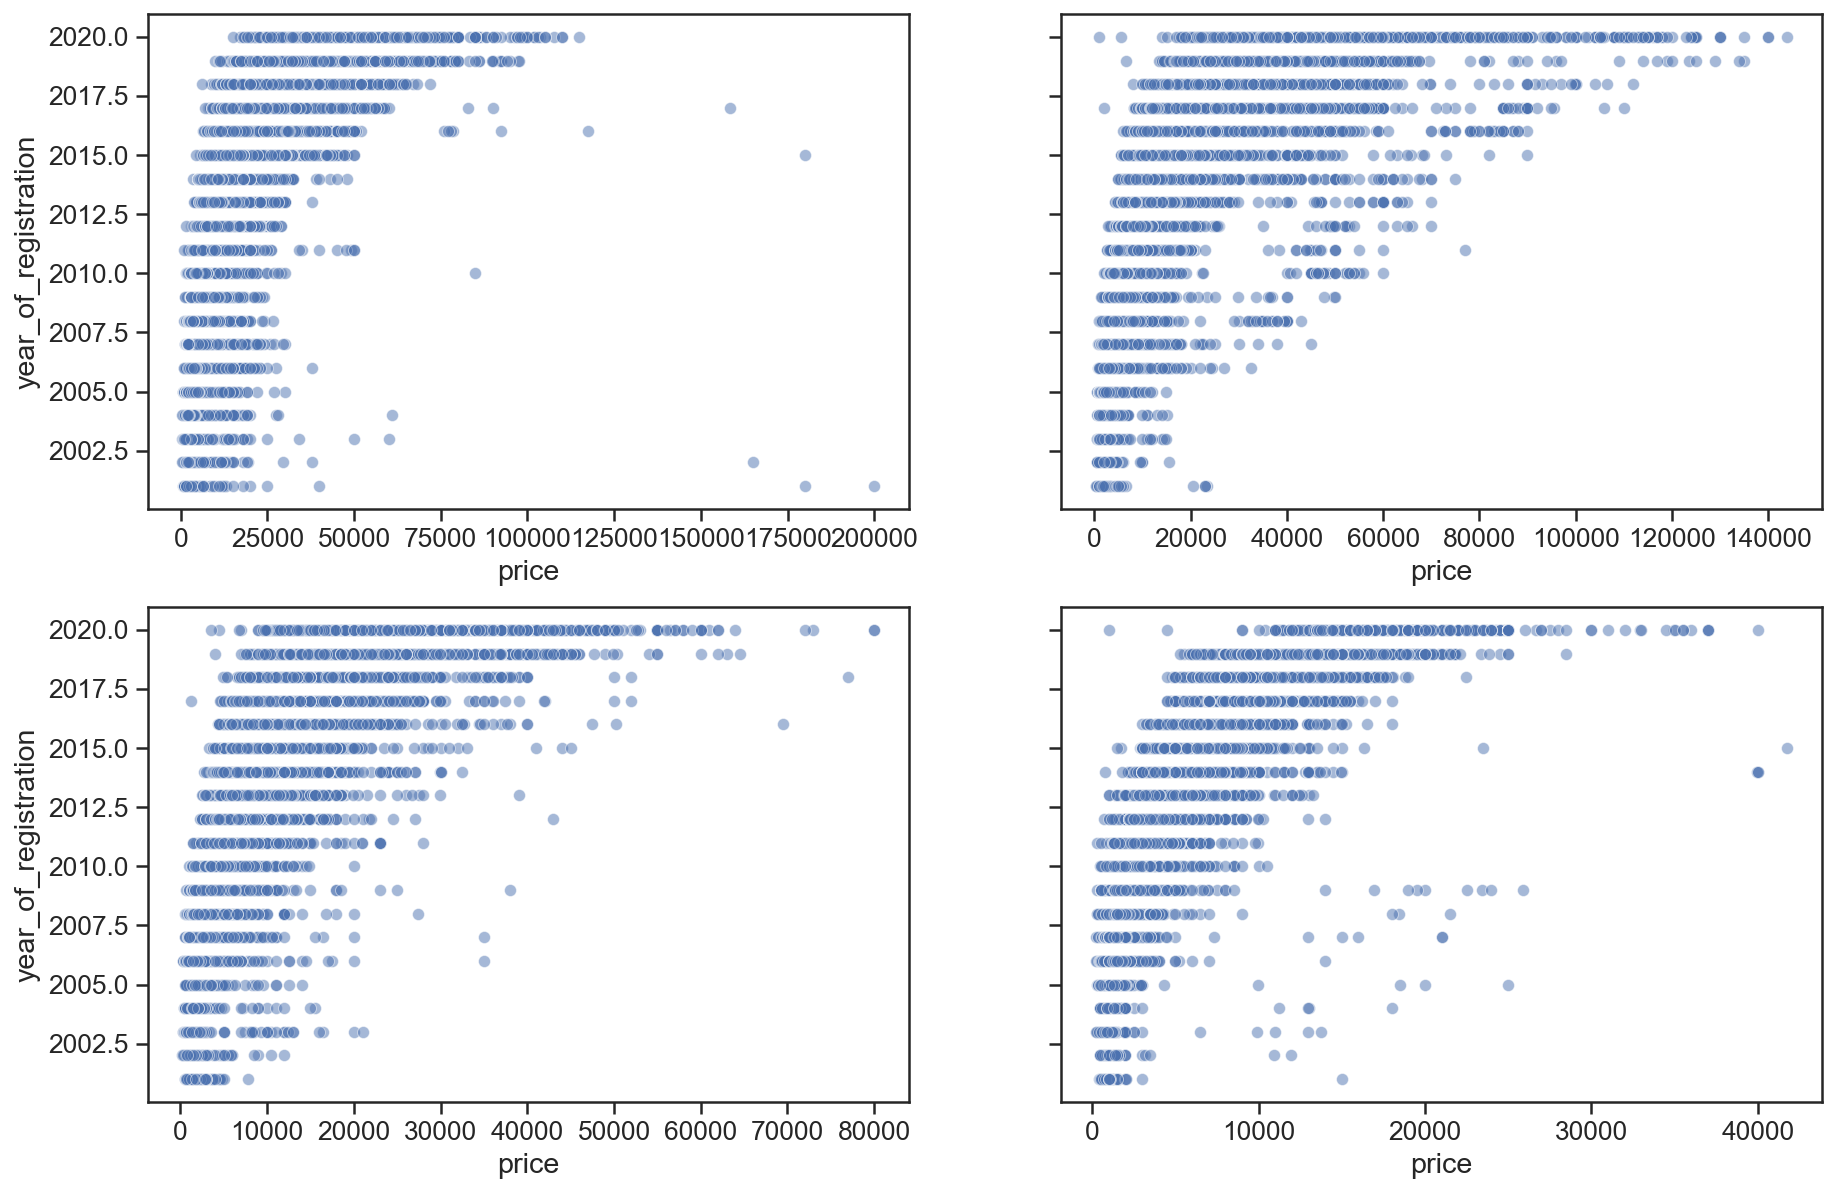

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True)
sns.scatterplot(data=adverts.query('standard_make == "BMW" & year_of_registration > 2000'), x='price', y='year_of_registration', ax=axs[0][0], alpha = 0.5)
sns.scatterplot(data=adverts.query('standard_make == "Audi" & year_of_registration > 2000'), x='price', y='year_of_registration',ax=axs[0][1], alpha = 0.5)
sns.scatterplot(data=adverts.query('standard_make == "Volkswagen" & year_of_registration > 2000'), x='price', y='year_of_registration', ax=axs[1][0], alpha = 0.5)
sns.scatterplot(data=adverts.query('standard_make == "Vauxhall" & year_of_registration > 2000'), x='price', y='year_of_registration', ax=axs[1][1], alpha = 0.5);

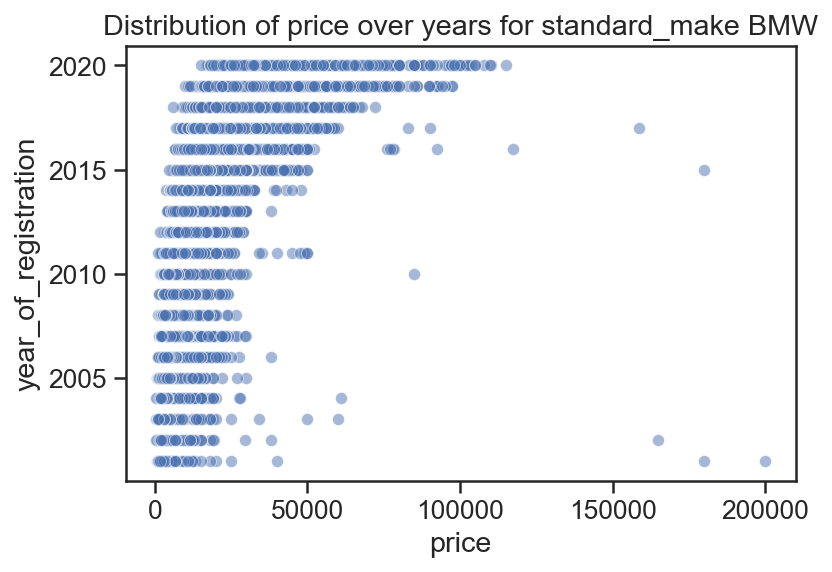

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=adverts.query('standard_make == "BMW" & year_of_registration > 2000'), x='price', y='year_of_registration', alpha = 0.5)
plt.title('Distribution of price over years for standard_make BMW')
plt.show()


From the scatterplot it can be concluded that for each brand as the year get closer to recent year there is an increase in the number of sales as well as the price at which the vehicle is sold also has a higher range. It can be also inferred that each brand has a defined price range which extends every range.

### Price Vs fuel_type

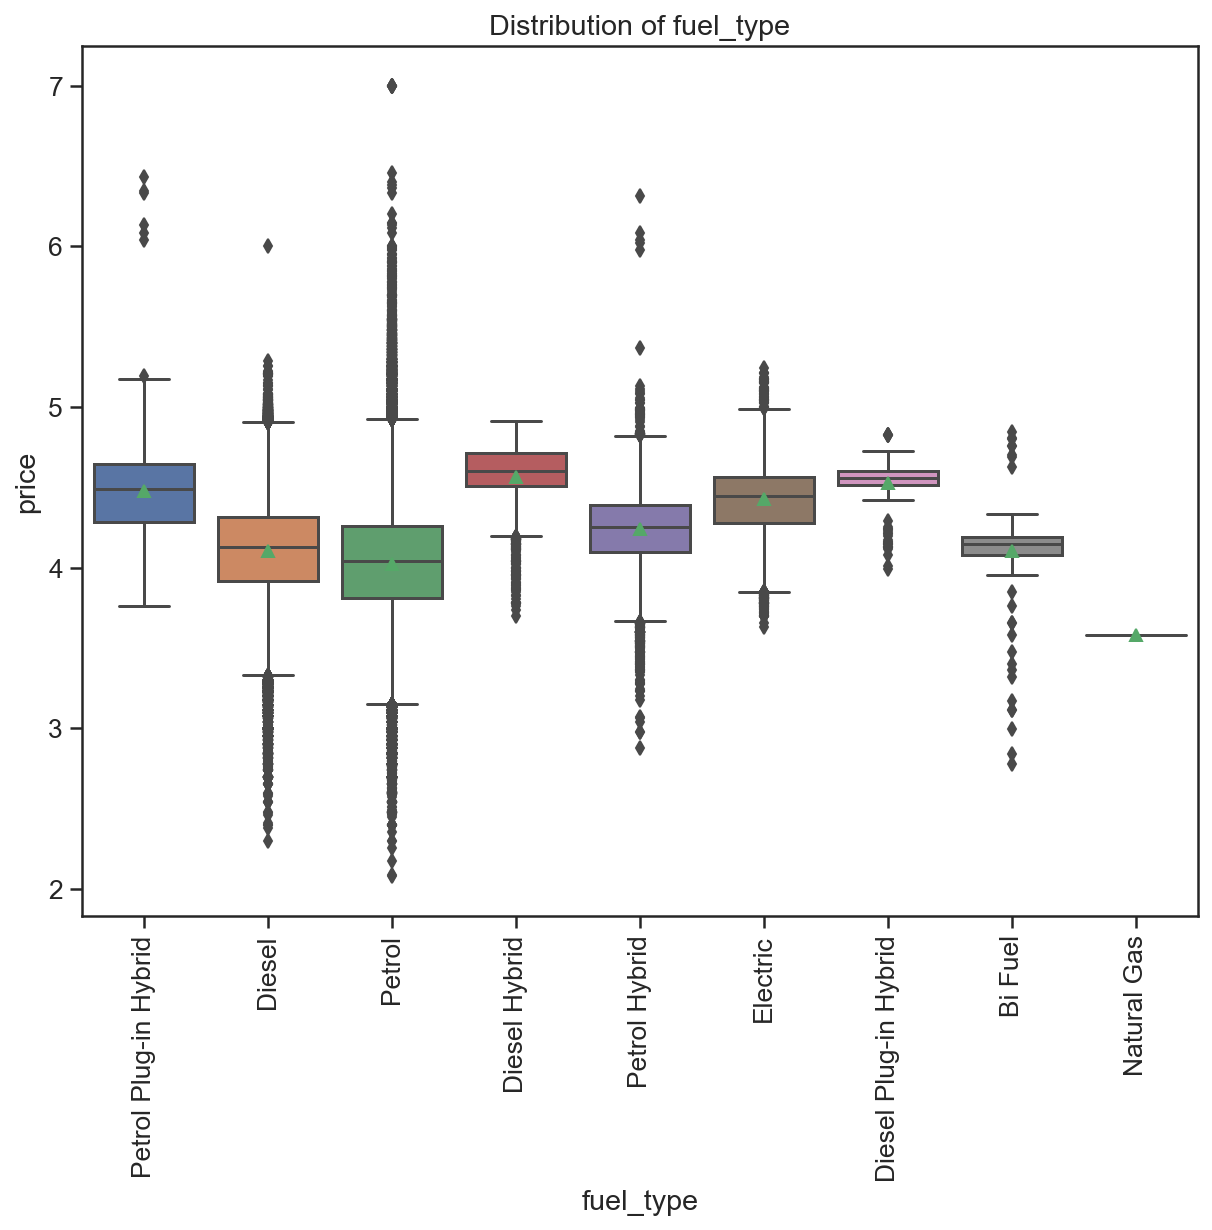

In [23]:
ax = sns.boxplot(x='fuel_type', y=np.log10(adverts['price']), showmeans=True, data=adverts)
plt.title('Distribution of fuel_type')
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('price')
ax.set_xlabel('fuel_type')
plt.show();

The mean of fuel type has only small variation from each other when compared against price. The major quantile of all the fuel_type falls into the same price range which is approximately 40000 to 50000 price range. Hence this feature may not affect the price to a large extend independently.

### 1.3. Data Processing for Data Exploration and Visualisation (1-2)


We need to fill the missing values for some of the categorical columns. Lets take the mode value and fill up these columns

In [282]:
adverts['standard_colour'].mode()

0    Black
dtype: object

In [283]:
adverts['body_type'].mode()

0    Hatchback
dtype: object

In [284]:
adverts['fuel_type'].mode()

0    Petrol
dtype: object

In [ ]:
# Filling some of the missing values with the mode values.
adverts['standard_colour'] = adverts['standard_colour'].fillna(value="Black")
adverts['body_type'] = adverts['body_type'].fillna(value="Hatchback")
adverts['fuel_type'] = adverts['fuel_type'].fillna(value="Petrol")

There are multiple steps where data processing is handled in this project. The processing of data for each step or plot will are performed in the related session itself to maintain the continuity of the sessions.

### 2. Data Processing for Machine Learning 
### 2.1. Dealing with Missing Values, Outliers, and Noise (1-2)
### 2.1.2 year_of_registration 

<b>Identification of outliers

In [27]:
year_subset = adverts.query('year_of_registration > 2000')

<AxesSubplot:xlabel='year_of_registration'>

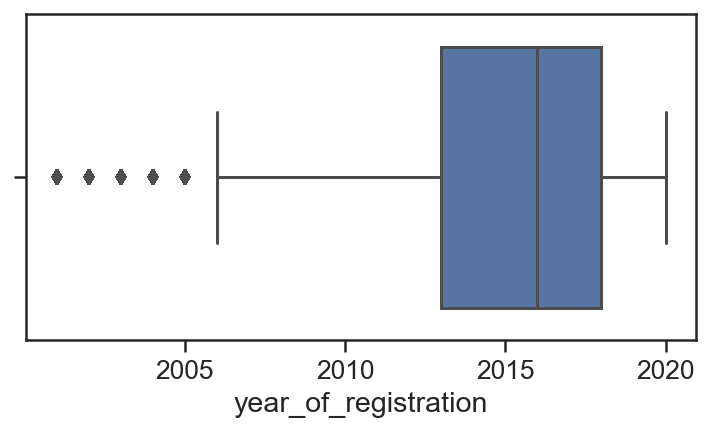

In [28]:
plt.subplots(figsize=(6,3))
sns.boxplot(x = year_subset['year_of_registration'] )

The year before 2006 are outliers. Hence we can remove these from the data. lets remove these outliers after dealing with the null values and noise.

<b>Identification and removal of noise

In [29]:
adverts['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

The year 1007,1063,1009,1016,1010,1008,1018,999,1017,1006,1015 are noises as there are no cars in the maret druing these years. Hence removing these years from the dataset.

In [30]:
len(adverts.loc[adverts['year_of_registration'] \
                  .isin([1007,1063,1009,1016,1010,1008,1018,999,1017,1006,1015])])

16

In [31]:
adverts = adverts.loc[~adverts['year_of_registration'].isin([1007,1063,1009,1016,1010,1008,1018,999,1017,1006,1015])]
len(adverts)

401989

The year_of_registration is null for the rows with vehicle_condition is NEW lets fill those with 2022 values as a representative value.

In [32]:
# Checking the count of vehicles in NEW and USEd conditions
adverts['vehicle_condition'].value_counts()

USED    370740
NEW      31249
Name: vehicle_condition, dtype: int64

In [33]:
# Lets fill in a representative value for the NEW vehivles in the year_of_registration column
adverts['year_of_registration'] = np.where(adverts['vehicle_condition'] == "NEW", 2022, adverts['year_of_registration'])

In [34]:
adverts['year_of_registration'].mode()

0    2017.0
dtype: float64

In [35]:
# Filling the null values of USED cars with the mode value
adverts['year_of_registration'] = adverts['year_of_registration'].fillna(value=2017)

<b>Removal of outliers

The years less than 2006 are shown as outliers. lets remove these records from the dataset. 

In [37]:
adverts = adverts.query('year_of_registration > 2005')

Mileage

In [41]:
mileage_subset = adverts.query('mileage < 400000')

<AxesSubplot:xlabel='mileage'>

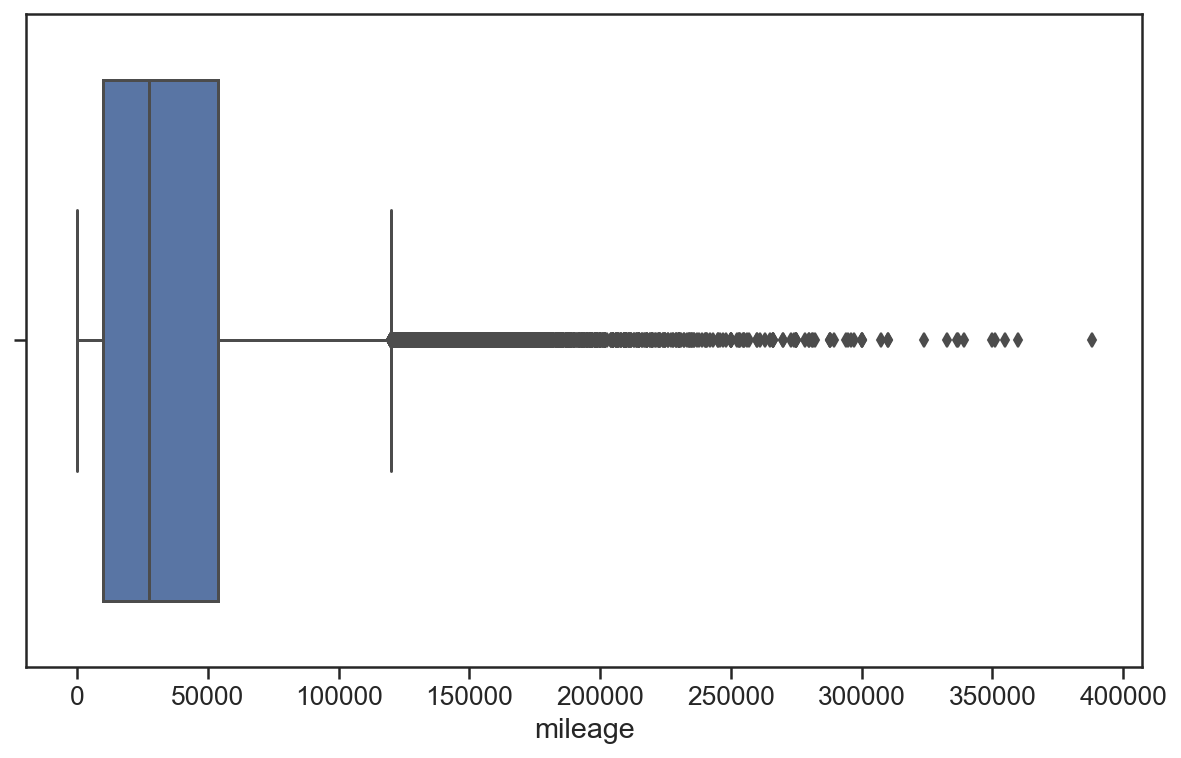

In [42]:
plt.subplots(figsize=(10,6))
sns.boxplot(x = mileage_subset['mileage'] )

The mileage above 125000 are outliers we can remove these records from the dataset.There are 127 rows with no mileage value these rows also can be removed from the dataset. But we need to seperate the NEW vehicles before removing the outliers as they have zero mileage.

In [43]:
# Splitting the dataset for outlier removal
adverts_2_1a_new = adverts.query('vehicle_condition == "NEW"')
adverts_2_1a_used = adverts.query('vehicle_condition == "USED"')

In [44]:
adverts_2_1a_used = adverts.query('mileage < 125000')
adverts = pd.concat([adverts_2_1a_new,adverts_2_1a_used])

In [52]:
adverts_2_1a.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31719
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

### 2.2. Feature Engineering, Data Transformations, Feature Selection (2-3)

In [ ]:
# 2.2.1 Dropping reg_code and Public_reference, crossover_car_and_van
adverts.drop(['public_reference','reg_code', 'crossover_car_and_van'],axis = 1, inplace =True)

### 2.2.1 one hot encoding for Vehicle_condition

In [58]:
vc_ohe = pd.get_dummies(adverts['vehicle_condition'])

In [59]:
vc_ohe.head()

,NEW,USED
0,1,0
17,1,0
19,1,0
37,1,0
44,1,0


In [60]:
adverts = pd.concat([adverts.drop(columns='vehicle_condition'), vc_ohe ], axis=1)

### 2.2.3 Categorical encoding for standard_make

In [62]:
adverts['standard_make'].unique()

array(['Volvo', 'Nissan', 'Volkswagen', 'Fiat', 'Honda', 'BMW',
       'Mitsubishi', 'Audi', 'Suzuki', 'Toyota', 'Hyundai', 'Peugeot',
       'Vauxhall', 'Citroen', 'Land Rover', 'SKODA', 'Jaguar', 'Kia',
       'Mercedes-Benz', 'Abarth', 'Renault', 'Dacia', 'Jeep',
       'Alfa Romeo', 'MG', 'DS AUTOMOBILES', 'SsangYong', 'SEAT', 'Lexus',
       'Mazda', 'MINI', 'Subaru', 'Alpine', 'CUPRA', 'Lotus', 'Smart',
       'Caterham', 'Dodge', 'Maserati', 'Morgan', 'Bentley',
       'Aston Martin', 'McLaren', 'Porsche', 'Ferrari', 'Saab',
       'Rolls-Royce', 'Chevrolet', 'Lamborghini', 'Daihatsu', 'Isuzu',
       'Tesla', 'GMC', 'Cadillac', 'Infiniti', 'Chrysler', 'Dax', 'Rover',
       'Perodua', 'Lincoln', 'Bugatti', 'Great Wall', 'Opel', 'Daimler',
       'AC', 'Proton', 'Westfield', 'Maybach', 'Corvette', 'LEVC',
       'Hummer', 'London Taxis International', 'Pagani', 'Pilgrim',
       'Aixam', 'Holden', 'Ariel', 'Plymouth', 'Iveco', 'BAC', 'Replica',
       'Beauford', 'Ultima', 'Mev'

In [64]:
adv3=adverts.copy()
adv3['standard_make'] = adv3['standard_make'].map({'Volvo':0, 'Jaguar':1, 'SKODA':2, 'Vauxhall':3, \
                        'Land Rover':4, 'Audi':5, 'Mercedes-Benz':6, \
                        'Volkswagen':7, 'Peugeot':8,'SEAT':9, 'MINI':10,\
                        'BMW':11, 'Nissan':12, 'Mitsubishi':13, 'Ferrari':14,\
                        'Citroen':15, 'Toyota':16, 'Kia':17,'Renault':18,\
                        'Fiat':19, 'Honda':20, 'Bentley':21, \
                        'DS AUTOMOBILES':22, 'Hyundai':23, 'Aston Martin':24,\
                        'McLaren':25, 'Smart':26, 'Alfa Romeo':27, 'Porsche':28,\
                        'Abarth':29, 'Mazda':30, 'Suzuki':31, 'MG':32, 'Dacia':33,\
                        'Subaru':34, 'SsangYong':35, 'Maserati':36, 'Saab':37,\
                        'Rolls-Royce':38, 'Lexus':39, 'Jeep':40, 'Panther':41, \
                        'Chevrolet':42, 'Lamborghini':43, 'Daihatsu':44, 'Dodge':45,\
                        'Isuzu':46, 'Lotus':47, 'Tesla':48, 'TVR':49, 'GMC':50,\
                        'Rover':51, 'Cadillac':52, 'Infiniti':53, 'Alpine':54, \
                        'Chrysler':55, 'Triumph':56, 'Morgan':57, 'Dax':58, \
                        'London Taxis International':59, 'Daimler':60, 'CUPRA':61,\
                        'Perodua':62, 'Lincoln':63, 'Bugatti':64, 'Great Wall':65,\
                        'Replica':66, 'Opel':67, 'AC':68, 'Proton':69, 'Lancia':70,\
                        'Austin':71, 'Morris':72, 'Westfield':73, 'Maybach':74, 'Corvette':75,\
                        'Tiger':76, 'LEVC':77, 'Iveco':78, 'Caterham':79, 'Hummer':80, \
                        'Carbodies':81, 'Jensen':82,'International':83, 'Daewoo':84, \
                        'Pagani':85, 'Wolseley':86, 'Pilgrim':87, 'Bristol':88, 'Aixam':89, \
                        'Holden':90, 'Reliant':91, 'Ariel':92, 'Plymouth':93, 'Leyland':94, \
                        'BAC':95, 'Beauford':96, 'Ultima':97, 'Mev':98, 'Datsun':99,'Zenos':100,\
                        'AK':101, 'Noble':102, 'Buick':103, 'Gentry':104, 'Sebring':105,\
                        'Radical':106, 'Pontiac':107, 'Mitsuoka':108, 'Custom Vehicle':109})


### 2.2.4 Categorical encoding for body_type

In [66]:
import sys
pd.set_option('display.max_rows',200)
np.set_printoptions(threshold=sys.maxsize)

In [67]:
adv3['body_type'].unique()

array(['SUV', 'Hatchback', 'Saloon', 'Estate', 'Convertible', 'Coupe',
       'Pickup', 'MPV', 'Combi Van', 'Minibus', 'Limousine', 'Panel Van',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

In [68]:
adv3['body_type'] = adv3['body_type'].map({'SUV':0, 'Saloon':1,\
        'Hatchback':2, 'Convertible':3, 'Limousine':4, 'Estate':5, \
       'MPV':6, 'Coupe':7, 'Pickup':8, 'Combi Van':9, 'Panel Van':10, 'Minibus':11,\
       'Window Van':12, 'Camper':13, 'Car Derived Van':14, 'Chassis Cab':15})

### 2.2.5 one hot encoding for fuel type

In [71]:
adv3['fuel_type'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Bi Fuel', 'Diesel Plug-in Hybrid'],
      dtype=object)

In [72]:
fuel_ohe = pd.get_dummies(adv3['fuel_type'])

In [74]:
adv3 = pd.concat([adv3.drop(columns='fuel_type'), fuel_ohe ], axis=1)

### 2.2.6 Label encoding for standard_model column

In [81]:
from sklearn.preprocessing import LabelEncoder
model_encoder = LabelEncoder()
model_encoder.fit(adv4['standard_model'])
model_values = model_encoder.transform(adv4['standard_model'])
model_values.shape

(383288,)

In [83]:
adv3['model'] = model_values.tolist()

In [85]:
adv3.query('standard_model == "Mokka"')['model'].unique()

array([549], dtype=int64)

## 2.2.7 Label Encoding for standard_colour

In [87]:
colour_encoder = LabelEncoder()
colour_encoder.fit(adv3['standard_colour'])
colour_values = colour_encoder.transform(adv3['standard_colour'])
colour_values.shape
adv3['colour'] = colour_values.tolist()

## 2.2.8 Data transformations

<b>Dropping the standard_model and standard_colour columns

In [93]:
adv3 = adv3.drop(columns=['standard_colour','standard_model'])

In [95]:
adv3['mileage']=adv3['mileage'].astype("int64")
adv3['year_of_registration']=adv3['year_of_registration'].astype("int64")

## 2.2.9 Subsetting the data for computational advantages

Lets take only a subset of the data for the model as whole dataset would take higher computational time and difficulty in plotting graphs. Lets subset the data based on some brands.

In [97]:
(adv3.loc[adv3['standard_make'].isin([11, 5, 3, 7, 6, 12, 16, 8, 4, 18])]['price'].sum()) / adv3['price'].sum()

0.6018583777192777

In the whole dataset the top 10 brands in the case of cars sold contribute to 60% of the price sum. Hence considering a subset of data for building the model taking 40% of the sample from top 10 brands.

In [98]:
a = [11, 5, 3, 7, 6, 12, 16, 8, 4, 18]

In [ ]:
df3 = pd.DataFrame()
for brand in a:
    df1= adv3.query('standard_make == @brand')
    df2 = df1.sample(frac = 0.4)
    df3= pd.concat([df3,df2])

In [101]:
adv_subset1 = df3.copy()

Now a subset of the data is created with 40% of the records from each brand for the top 10 brands. The subset contains 96432 records.

## 2.2.10 Target split

In [102]:
X = adv_subset1.drop(columns='price')
y = adv_subset1['price']

## 2.2.11 Test-Train split

In [105]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72324, 16), (72324,), (24108, 16), (24108,))

### 3. Model Building 
### 3.1. Algorithm Selection, Model Instantiation and Configuration (1-2)
We have various regression model as follows:
<br>Linear Regression
<br>Knn Regression
<br>Decision Tree Regression
<br>Random Forest Regression

### 3.1.1 Knn Regression

In [286]:
from sklearn.neighbors import KNeighborsRegressor
knn_7 = KNeighborsRegressor(7)
knn_7.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

The knn regressor with neighbour value is built. Lets analyse the result by the mean_absolute_error and the score method.

### Evaluate

In [288]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mean_absolute_error(knn_7.predict(X_test), y_test)

5605.785850577164

In [289]:
mean_absolute_percentage_error(knn_7.predict(X_test), y_test)

0.368523208950063

In [111]:
mean_absolute_error(knn_7.predict(X_train), y_train)

4870.00036146863

In [290]:
knn7_score_test = knn_7.score(X_test, y_test)
knn7_score_train = knn_7.score(X_train, y_train)
knn7_score_test,knn7_score_train

(0.5898165261171744, 0.6740601810634061)

The scores of the test and train dataset is 0.58 and 0.67 respectively. The score of the train is is more than that of the test set which indicates that the model is overfitted to the train data but the variation between the test and the train score is relatively small.

### Analyse

Lets plot the true Vs predicted plot to see the variation in the data predicted.

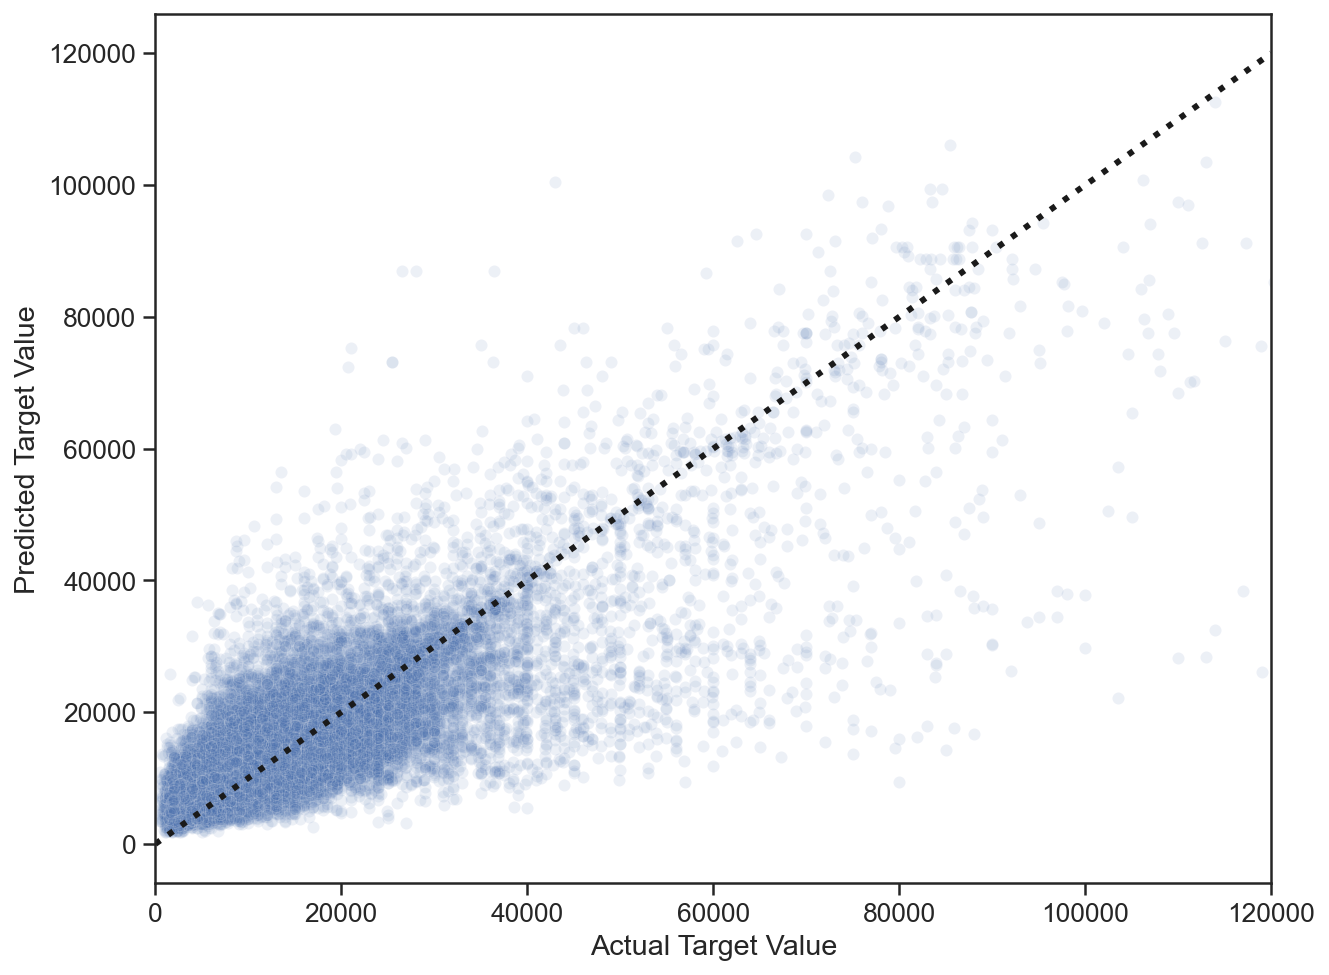

In [117]:
y_true = y_test
y_pred = knn_7.predict(X_test)
ax = sns.scatterplot(x=y_true, y=y_pred, alpha=0.1)
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
ax.set_xlim(0, 120000)
#ax.set_ylim(0, 60000)
ax.plot((0, 120000), (0, 120000), ':k', alpha=1, lw=3);
#ax.show()

The true Vs predicted plot is skewed towards the diagnol axis. But there are plenty of scattered point over the plot which shows the more count of data which are predicted wrong or not close enough.

The knn regressor with the neighbour value 7 has given a model score of 0.58 for the test data. the mean_absolute_error has come as 5605.531. The test set and the train set has the scores 0.58 and 0.67 rptly. Lets try other regressors also to see if other regression model gives better score for the dataset.

## 3.1.2 Decision Tree Regressor

In [292]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Model Evaluation

In [293]:
mean_absolute_error(dt.predict(X_test), y_test)

5207.803306490437

In [294]:
mean_absolute_error(dt.predict(X_train), y_train)

5299.70858834909

In [295]:
dt.score(X_test,y_test)

0.6224494326180829

In [296]:
dt5_score_train = dt.score(X_train,y_train)
dt5_score_test = dt.score(X_test,y_test)
dt5_score_train,dt5_score_test

(0.6089889979283809, 0.6224494326180829)

The decision tree regressor gives an increased score of 0.62 for the test dataset where the knn regressor only gave 0.58. The mean absolute error of the test data is also reduced to 5207. In the decision tree regressor it can also be seen that the test and train mean_absolute_error has come closer. all the above points indicates that the decision tree regressor is a better model than knn regressor for this dataset.

### Regression Result Analysis

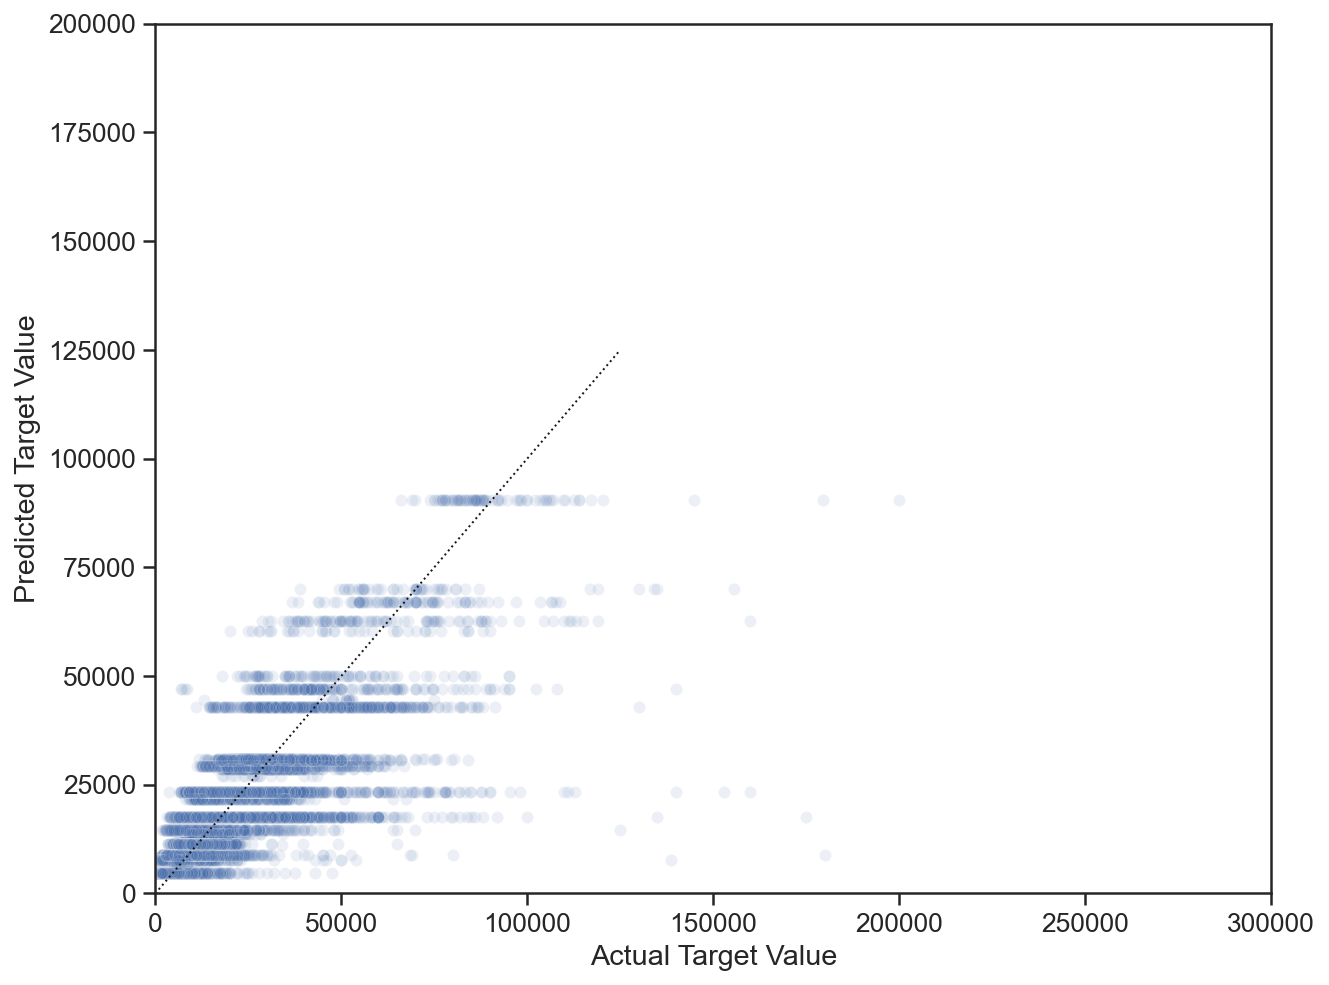

In [298]:
y_true = y_test
y_pred = dt.predict(X_test)
ax = sns.scatterplot(x=y_true, y=y_pred, alpha=0.1)
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
ax.set_xlim(0, 300000)
ax.set_ylim(0, 200000)
ax.plot((0, 125000), (0, 125000), ':k', alpha=1, lw=1);
#ax.show()

The true vs predicted plot for decision tree regressor is plotted above. From the plot it can seen that even though the graph is skewed towards the diagnol axis there are high number of records where the distance between the actual and predicted value is very high. But the considering the overall score and the mean_absolute_error the model has predicted well than the knn regressor in the case.

## RandomForestRegressor

In [301]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [302]:
mean_absolute_error(y_train, rfr.predict(X_train))

805.0080386467778

In [303]:
mean_absolute_error(y_test, rfr.predict(X_test))

1911.3789987618097

In [304]:
rfr.score(X_test,y_test)

0.9331579424356594

In [305]:
rfr.score(X_train,y_train)

0.9823152486568919

The random forest regressor has given out the score of 0.93 for the test set. The score has increased considerably from the knn regressor and the decision tree regressor. The mean_absolute_error has also dropped to 1911 for the test set. Lets analyse the true vs predicted plot for the random forest regressor.

### Regression Result Analysis

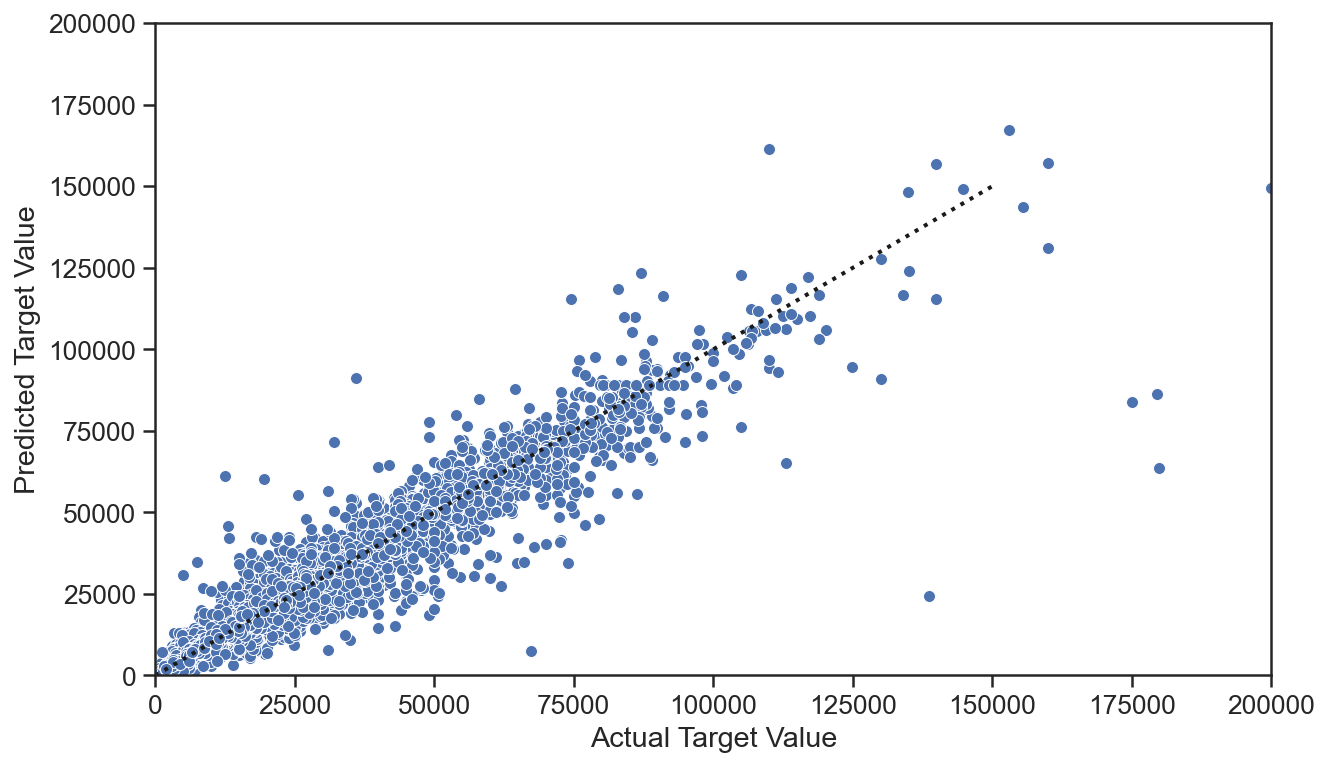

In [307]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x=y_test, y=rfr.predict(X_test))
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
ax.set_xlim(0, 200000)
ax.set_ylim(0, 200000)
ax.plot((0, 150000), (0, 150000), ':k', alpha=1, lw=2);

The graph above represents the true Vs predicted plot for the random forest regressor. From the graph it is evident that the model prediction is very close to the actual value for most of the records. The number of records scattered away from the diagnol axis has also reduced considerably.

### 3.2. Grid Search, and Model Ranking and Selection
Grid search is a powerful technique for tuning hyperparameters in regression models. It systematically evaluates a predefined grid of parameter values, training a model for each combination. By comparing the performance of these models, grid search helps identify the optimal hyperparameter configuration that yields the best results for your specific regression task.

### 3.2.1 Decision Tree Regressor - Grid Search

In [138]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, balanced_accuracy_score
grid_param = {
    'max_depth': [2,4,5,6,8,10,12,16,20,40,60]#,
    #'min_samples_split': [ 10, 12, 3 ],
    #'min_samples_leaf': [ 4, 8, 12]
}
grid = GridSearchCV(
    DecisionTreeRegressor(),
    grid_param,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 5, 6, 8, 10, 12, 16, 20, 40, 60]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [139]:
grid.best_params_

{'max_depth': 16}

In [140]:
grid.best_score_

-2301.7008712429715

In [141]:
grid.cv_results_

{'mean_fit_time': array([0.04038677, 0.06471882, 0.07838387, 0.09246578, 0.11820188,
        0.14591761, 0.15880795, 0.18660293, 0.213024  , 0.23378215,
        0.23192968]),
 'std_fit_time': array([0.00163522, 0.00153962, 0.00455119, 0.00397767, 0.00371473,
        0.00650821, 0.00264591, 0.00671467, 0.00851415, 0.00586849,
        0.00298953]),
 'mean_score_time': array([0.00316401, 0.00260005, 0.00267563, 0.00289969, 0.00319033,
        0.00405316, 0.00426865, 0.00466418, 0.00574579, 0.00714459,
        0.00717564]),
 'std_score_time': array([0.00025409, 0.00049056, 0.00042212, 0.00012229, 0.00041271,
        0.00054706, 0.00053144, 0.00040058, 0.00022973, 0.000693  ,
        0.00045422]),
 'param_max_depth': masked_array(data=[2, 4, 5, 6, 8, 10, 12, 16, 20, 40, 60],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 4},

In [142]:
gs_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

In [143]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [144]:
gs_results[
    ['param_max_depth',  'mean_train_score', 
     'mean_test_score', 'rank_test_score'  ] 
]

,param_max_depth,mean_train_score,mean_test_score,rank_test_score
7,16,-1263.531661,-2301.700871,1
8,20,-621.974247,-2391.612702,2
9,40,-120.081858,-2507.994074,3
10,60,-120.059465,-2510.693991,4
6,12,-2207.176176,-2632.552926,5
5,10,-2842.390843,-3080.464077,6
4,8,-3774.881638,-3901.170557,7
3,6,-4766.704227,-4832.735857,8
2,5,-5262.832712,-5300.258522,9
1,4,-5898.380634,-5924.678607,10


In [145]:
best_dt = grid.best_estimator_
best_dt

DecisionTreeRegressor(max_depth=16)

In [146]:
mean_absolute_error(best_dt.predict(X_test),y_test)

2128.5022044579473

In [147]:
mean_absolute_error(best_dt.predict(X_train),y_train)

1303.9932653374744

In [308]:
dt_16 = DecisionTreeRegressor(max_depth=16)
dt_16.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16)

In [309]:
mean_absolute_error(dt_16.predict(X_test), y_test)

2124.8213544994683

In [310]:
mean_absolute_error(dt_16.predict(X_train), y_train)

1304.0138947274418

In [311]:
dt_16.score(X_test,y_test)

0.9106322998544075

In [312]:
dt.score(X_train,y_train)

0.6089889979283809

As per the grid search method the best depth for the decision tree regressor is 16. While training the data again with this depth it can be seen that there is an increase in the score to 0.91 from the previous decision tree regressor model score of 0.62. The mean absolute error has also dropped from 5207 to 2124 for the test set. Hence it can be concluded that the decision tree regressor model best works with the maximum depth of 16 for this dataset. But when compared with the random forest regressor model the score is still less as the random forest regressor has given a score of 0.93.

## 3.2.2 Knn regressor - Ranking & underfitting/overfitting check

Lets find the scores and mean_absolute_error for different n values for the knn regressor

In [153]:
neighbours = [1,3,5,7,9]
score = pd.DataFrame(columns=['n','train','test','mae_train','mae_test', 'mae_var'])
for n in neighbours:
    knn = KNeighborsRegressor(n)
    knn.fit(X_train, y_train)
    knn_score_test = knn.score(X_test, y_test)
    knn_score_train = knn.score(X_train, y_train)
    mae_train = mean_absolute_error(knn.predict(X_train), y_train)
    mae_test = mean_absolute_error(knn.predict(X_test), y_test)
    mae_var = abs(mae_train-mae_test)
    score = score.append({'n':n, 'train':knn_score_train,\
                          'test': knn_score_test, 'mae_train': mae_train,\
                         'mae_test':mae_test, 'mae_var': mae_var},ignore_index=True)
score

,n,train,test,mae_train,mae_test,mae_var
0,1.0,0.992028,0.447314,152.876528,5904.551850,5751.675322
1,3.0,0.786584,0.573453,3776.256393,5532.051532,1755.795139
2,5.0,0.716538,0.590694,4483.114814,5540.971238,1057.856424
3,7.0,0.674060,0.589817,4870.000361,5605.785851,735.785489
4,9.0,0.643891,0.584538,5134.761310,5686.017454,551.256144


In [154]:
scores_subset = score[['n','train','test']]
scores_subset['n'] = scores_subset['n'].astype("int64")
scores_subset

C:\Users\Akshaya\AppData\Local\Temp/ipykernel_28084/538429535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_subset['n'] = scores_subset['n'].astype("int64")


,n,train,test
0,1,0.992028,0.447314
1,3,0.786584,0.573453
2,5,0.716538,0.590694
3,7,0.674060,0.589817
4,9,0.643891,0.584538


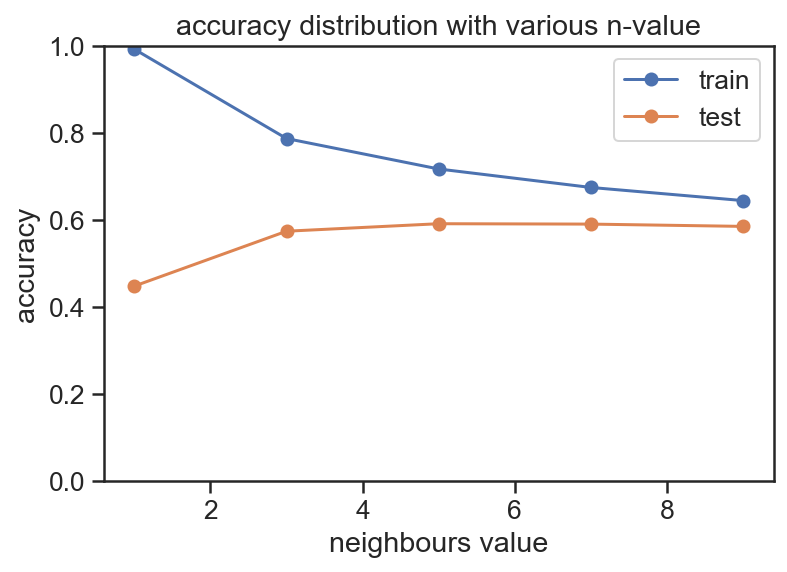

In [155]:
fig, ax = plt.subplots(figsize=(6,4))
scores_subset.plot(x= 'n', marker='o', ax=ax)
ax.set_xlabel('neighbours value')
ax.set_ylabel('accuracy')
plt.title('accuracy distribution with various n-value')
ax.set_ylim(0,1);

Here when the neighbour values is of neighbours are increased the train and test scores become more closer. It can be seen that for the n value 1 the train set has overfitted the data and the test set offers very low score. But the increase of score from 1 to 2 has caused a high change in the fitting of model. 

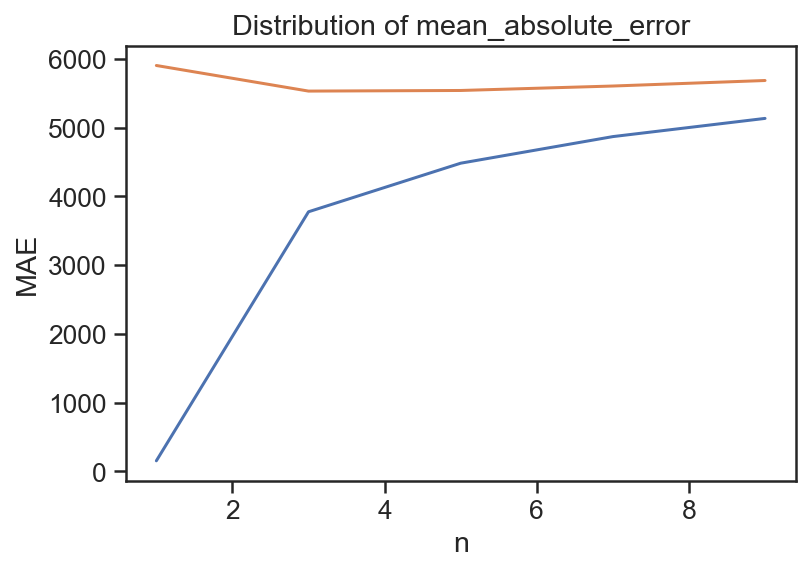

In [156]:
plt.figure(figsize=(6,4))
sns.lineplot(data=score, x='n', y='mae_train')
sns.lineplot(data=score, x='n', y='mae_test')
plt.ylabel('MAE')
plt.title('Distribution of mean_absolute_error')
plt.show()

The orange line is the mean_absolute_error(MAE) of test and the blue is the one for train. It can be seen when the n-value changes from 1 to 3 there is a sudden jump in the training MAE indicating single n-value leads to an overfitted model. As the n-value increases the train error is also increasing. From the above two graphs optimum n-value with minimum error and maximum score is 7.

So, for knn regressor with n-value 7 the model is offering a score of 0.67 in train and 0.58 in test set.

Below are the test scores from three models:
<br>Knn Regressor: 0.58
<br>Decision Tree Regressor: 0.91
<br>Random Forest Regressor: 0.93

In [313]:
score_models = pd.DataFrame({'model': ['Knn Regressor', 'Decision Tree Regressor','Random Forest Regressor'], 'score': ['.58','.91','.93']})
score_models

,model,score
0,Knn Regressor,.58
1,Decision Tree Regressor,.91
2,Random Forest Regressor,.93


In [314]:
score_models['score'] = score_models['score'].astype("float64")

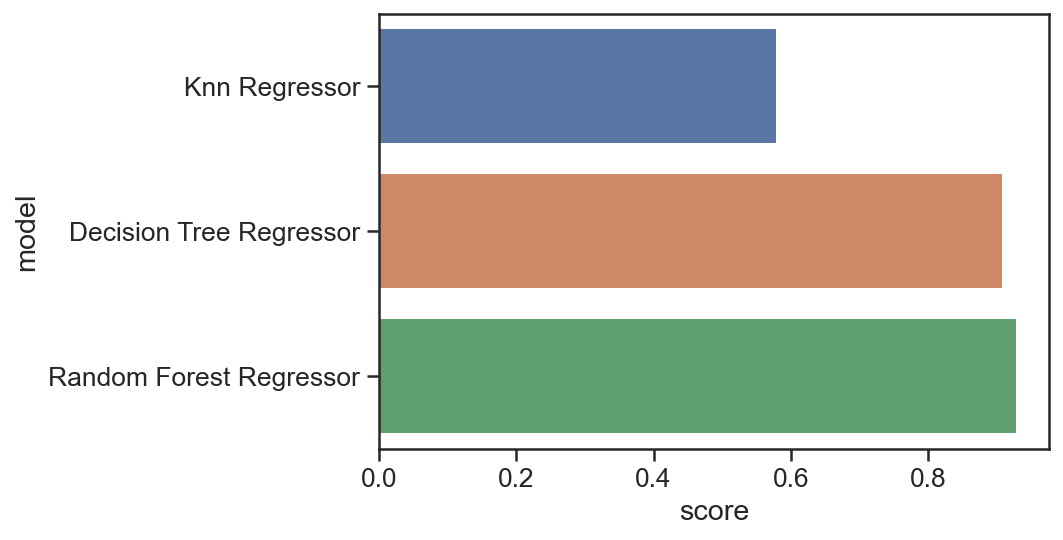

In [315]:
plt.figure(figsize=(6,4))
sns.barplot(data=score_models, x = "score", y="model")
#plt.ylabel('MAE')
#plt.title('Distribution of mean_absolute_error')
plt.show()

The Random Forest Regressor has given the maximum score out of the three model which is 0.93. Hence selecting the Random Forest Regressor as the base model for further analysis.

### 4. Model Evaluation and Analysis 

In [316]:
rfr.score(X_test,y_test)

0.9331579424356594

### 4.1. Coarse-Grained Evaluation/Analysis (1-2) (e.g., with model scores)

### 4.1.1 Residual loss Analysis

In [317]:
residual = rfr.predict(X_test) - y_test
residual = pd.Series(residual).rename('residual')
residual_abs = residual.abs().rename('residual_abs')

In [ ]:
X_test_res = pd.concat([ X_test, y_test, residual, residual_abs ], axis='columns')
X_test_res.sort_values('residual_abs', ascending=False)

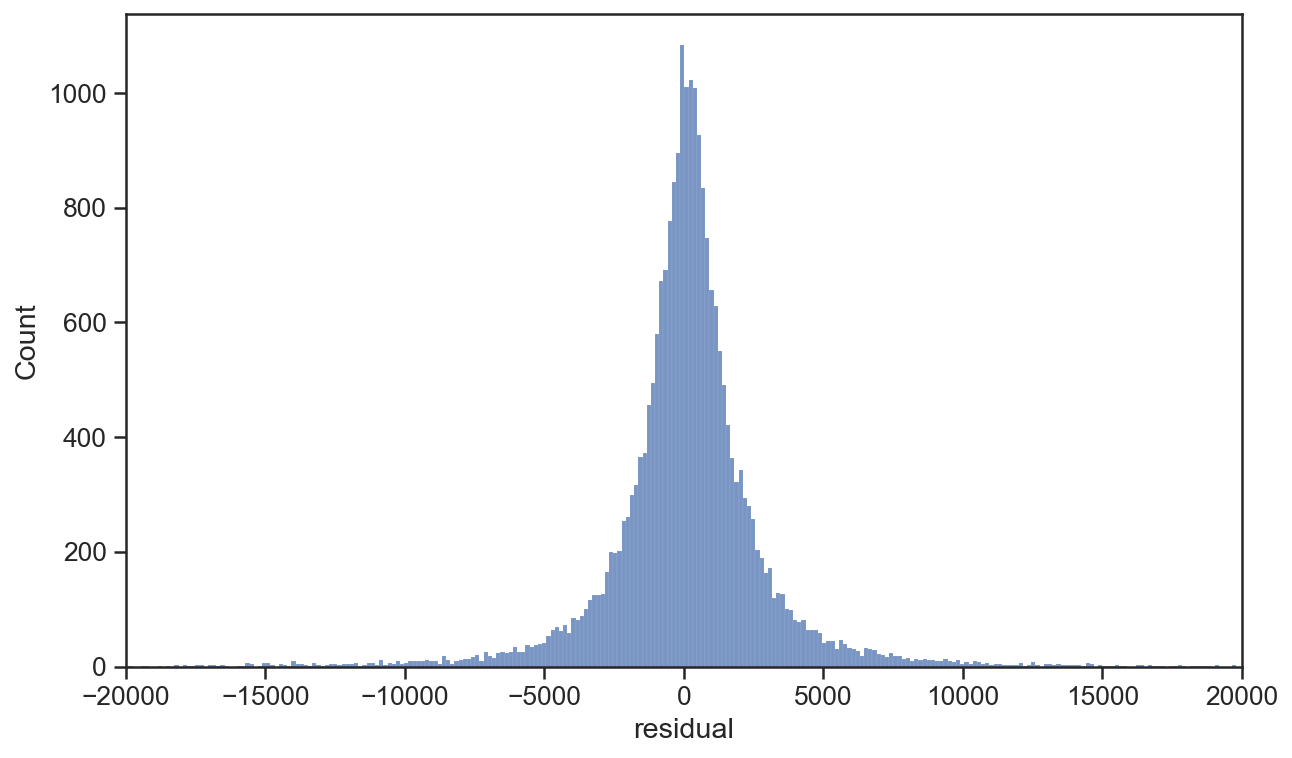

In [319]:
plt.figure(figsize=(10,6))
sns.histplot(data = X_test_res, x=residual).set_xlim(-20000,20000)
plt.show()

According to the residual graph, more records are falling near to the 0 value which implies for more number of records the predicted values is closer to the actual value. The spread of the graph in the X and y direction is limited and for the highly skewed values that suggests more number of the values are predicted closer to the actual value. Still there are considerable sum of records predicted out of the allowable range. The exponential increase in the count while the x-value gets closer to 0 indicates the power of the model to predict values which are closer to the actual value.

### 4.1.2 Cross-Validation for Random Forest Regressor

In [320]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [321]:
scores = cross_val_score(rfr, X_test, y_test, cv=5)
scores

array([0.92388746, 0.88166458, 0.88810775, 0.89989256, 0.90349561])

In [322]:
scores = np.abs(scores)
scores

array([0.92388746, 0.88166458, 0.88810775, 0.89989256, 0.90349561])

In [323]:
scores.mean(), scores.std()

(0.8994095904376891, 0.014551369345963442)

In [324]:
from sklearn.model_selection import cross_validate
res = cross_validate(rfr, X3_fi, y3_fi, cv=5,
                     return_train_score=True)
res

{'fit_time': array([18.79044104, 16.39006209, 16.33632803, 16.12701845, 16.30356264]),
 'score_time': array([0.41178918, 0.32183075, 0.3999083 , 0.37124014, 0.36824417]),
 'test_score': array([ 0.35030994,  0.89703903, -1.62705668, -0.16858396, -0.2385269 ]),
 'train_score': array([0.97378271, 0.97397586, 0.97969375, 0.97420852, 0.97483857])}

The cross-validation scores are very close enough which ranges from 0.88 to 0.92. the actual model score is 0.93 which is very close to the cross-validation score. The scores of each folds being close indicates that the model is a representative model for the selected subset as there is not much variation in the scores while considering the test set from different folds.

### 4.2. Feature Importance (2-4)
Feature importance analysis in regression models helps us understand which variables have the strongest influence on the target variable we're trying to predict. By ranking features based on their importance, we can identify the most impactful factors driving the model's predictions. This knowledge can be crucial for optimizing the model, focusing resources on the most relevant data, and gaining deeper insights into the underlying relationships within the data.

In [325]:
fi = rfr.feature_importances_
fi

array([7.86548250e-02, 1.69075431e-01, 3.23166118e-01, 6.50913477e-02,
       2.53848304e-03, 2.53000732e-03, 0.00000000e+00, 1.00841168e-02,
       1.11641361e-04, 4.44557377e-05, 6.24741662e-03, 2.53778608e-02,
       1.75643460e-03, 2.28672071e-03, 3.00855301e-01, 1.21798405e-02])

In [326]:
features = np.array(X_train.columns)
features

array(['mileage', 'standard_make', 'year_of_registration', 'body_type',
       'NEW', 'USED', 'Bi Fuel', 'Diesel', 'Diesel Hybrid',
       'Diesel Plug-in Hybrid', 'Electric', 'Petrol', 'Petrol Hybrid',
       'Petrol Plug-in Hybrid', 'model', 'colour'], dtype=object)

In [327]:
feat_imp = pd.DataFrame({'features': features, 'feat_imp': fi})
feat_imp = feat_imp.sort_values('feat_imp', ascending = False)
feat_imp

,features,feat_imp
2,year_of_registration,0.323166
14,model,0.300855
1,standard_make,0.169075
0,mileage,0.078655
3,body_type,0.065091
11,Petrol,0.025378
15,colour,0.012180
7,Diesel,0.010084
10,Electric,0.006247
4,NEW,0.002538


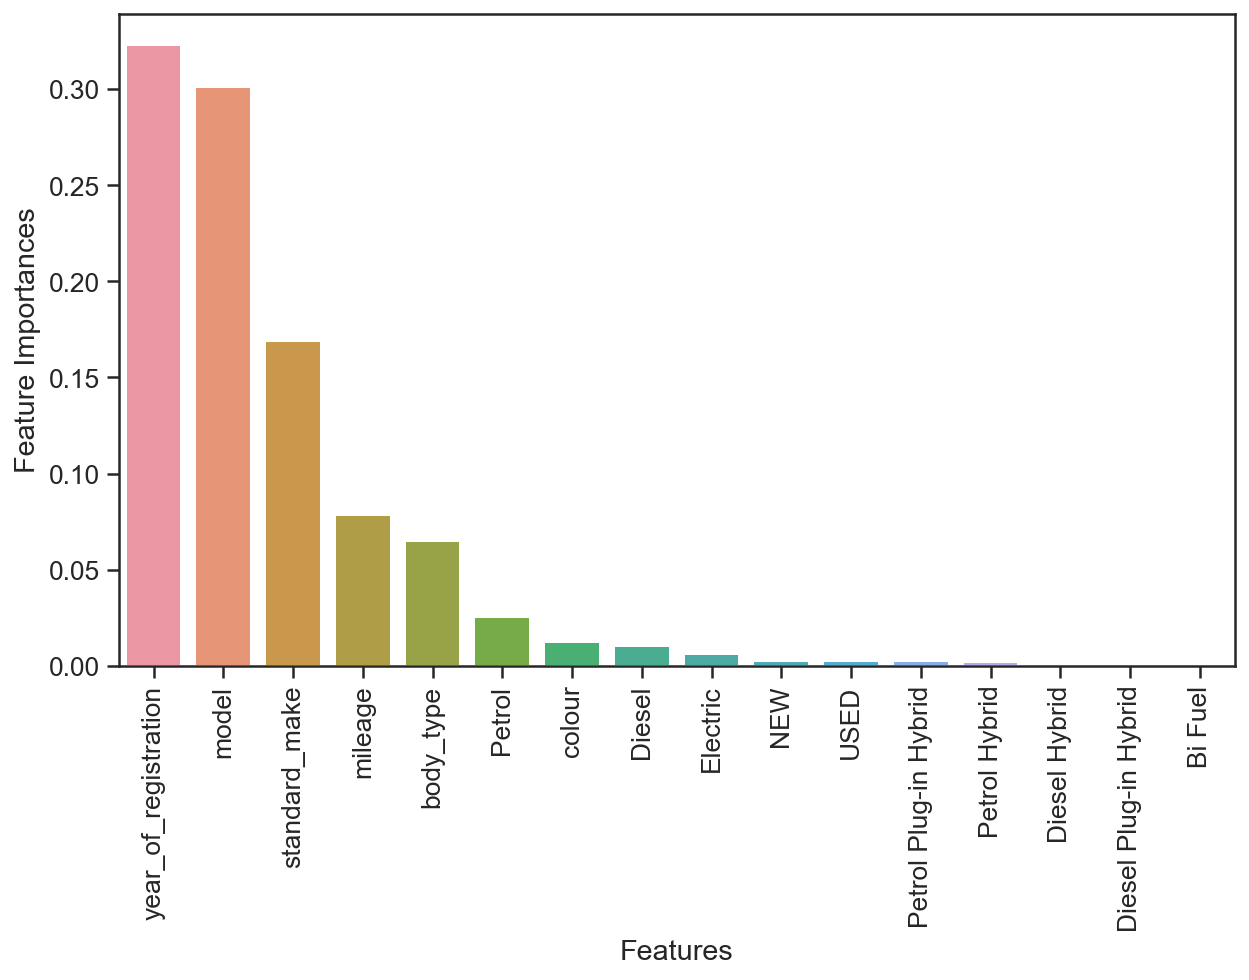

In [328]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=feat_imp, x='features', y='feat_imp')
ax.set(xlabel='Features',ylabel='Feature Importances')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

According to the feature importance suggestion the fuel_type, colour and vehicle_condition does not seem to be very much affecting the model. The current score of the model is 0.93. According to feature importance lets leave one feature out and see the effect on the model.

### Leave one out and effect on perfomance
In here according to the feature importance analysis, we will leave some feature and retrain our model to see the impact.

<b>Fuel_type

According to the feature_importance graph the fuel_type is one of the least affecting feature. Lets drop this column, rebuild the model and see if the score is changing.

In [195]:
adv_subset1.head(1)

,mileage,standard_make,year_of_registration,price,body_type,NEW,USED,Bi Fuel,Diesel,Diesel Hybrid,Diesel Plug-in Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid,model,colour
191433,92000,11,2009,11495,0,0,1,0,1,0,0,0,0,0,0,855,18


In [329]:
fi_1=adv_subset1[['mileage','standard_make','year_of_registration','body_type','NEW','USED','model','colour','price']]

In [330]:
X1_fi = fi_1.drop(columns='price')
y1_fi = fi_1['price']

In [331]:
X1_fi_train, X1_fi_test, y1_fi_train, y1_fi_test = train_test_split(X1_fi, y1_fi, test_size=0.25, random_state=42)
X1_fi_train.shape, y1_fi_train.shape, X1_fi_test.shape, y1_fi_test.shape

((72324, 8), (72324,), (24108, 8), (24108,))

In [332]:
rfr.fit(X1_fi_train, y1_fi_train)

RandomForestRegressor()

In [333]:
rfr.score(X1_fi_test, y1_fi_test)

0.9192417997963553

The score has dropped to 0.91 while dropping the fuel_type column which indicates this column has a small inportance in the model as avoiding the feature reduced the the score by 0.02.

<b>Colour

The colour feature is also a feature which has only 0.005083 feature importance. Lets avoid this feature and see the model perfomance.

In [334]:
fi_2 = adv_subset1.drop(columns = 'colour')

In [335]:
X2_fi = fi_2.drop(columns='price')
y2_fi = fi_2['price']

In [336]:
X2_fi_train, X2_fi_test, y2_fi_train, y2_fi_test = train_test_split(X2_fi, y2_fi, test_size=0.25, random_state=42)
X2_fi_train.shape, y2_fi_train.shape, X2_fi_test.shape, y2_fi_test.shape

((72324, 15), (72324,), (24108, 15), (24108,))

In [337]:
rfr.fit(X2_fi_train, y2_fi_train)

RandomForestRegressor()

In [338]:
rfr.score(X2_fi_test, y2_fi_test)

0.9309764120898127

While avoiding the feature colour from the model, the score is not much affected. The score remains to be 0.93. It can be inferred that this feature is of least importance and can be avoided from the dataset without affecting the model score.

<b>Vehicle_condition

The next least affected feature is the vehicle_condition. Lets remove this column and see if the model score is affected.

In [339]:
fi_3=fi_2.drop(columns = ['NEW','USED'])

In [340]:
X3_fi = fi_3.drop(columns='price')
y3_fi = fi_3['price']

In [341]:
X3_fi_train, X3_fi_test, y3_fi_train, y3_fi_test = train_test_split(X, y, test_size=0.25, random_state=42)
X3_fi_train.shape, y3_fi_train.shape, X3_fi_test.shape, y3_fi_test.shape

((72324, 16), (72324,), (24108, 16), (24108,))

In [342]:
rfr.fit(X3_fi_train, y3_fi_train)

RandomForestRegressor()

In [343]:
rfr.score(X3_fi_test, y3_fi_test)

0.9341242528963971

In [344]:
loss_after = mean_absolute_error(y3_fi_test, rfr.predict(X3_fi_test))
loss_after

1907.5230826179227

While doing the feature importance for the dataset the fuel_type, colour and vehicle condition were the features having the least scores for feature importance. The analysis  carried out by fitting the model after leaving each of the feature. From this analysis it came out to be that the colour and the vehicle_condition column can be avoided without affecting the model score. X3_fi,y3_fi are the final subset of data after avoiding the least effective features. X3_fi_train, y3_fi_train, X3_fi_test, y3_fi_test are the train/test splitted dataset.

### 4.3. Fine-Grained Evaluation (1-2) (e.g., with instance-level errors)

### True Vs Predicted Plot
The "true vs. predicted" plot in regression analysis visualizes how well a model's predictions align with the actual data points. Ideal predictions cluster closely around a diagonal line, indicating the model accurately captures the relationship between features and target variables. Deviations from this line reveal discrepancies between predicted and true values, highlighting areas for model improvement.

(0.0, 120000.0)

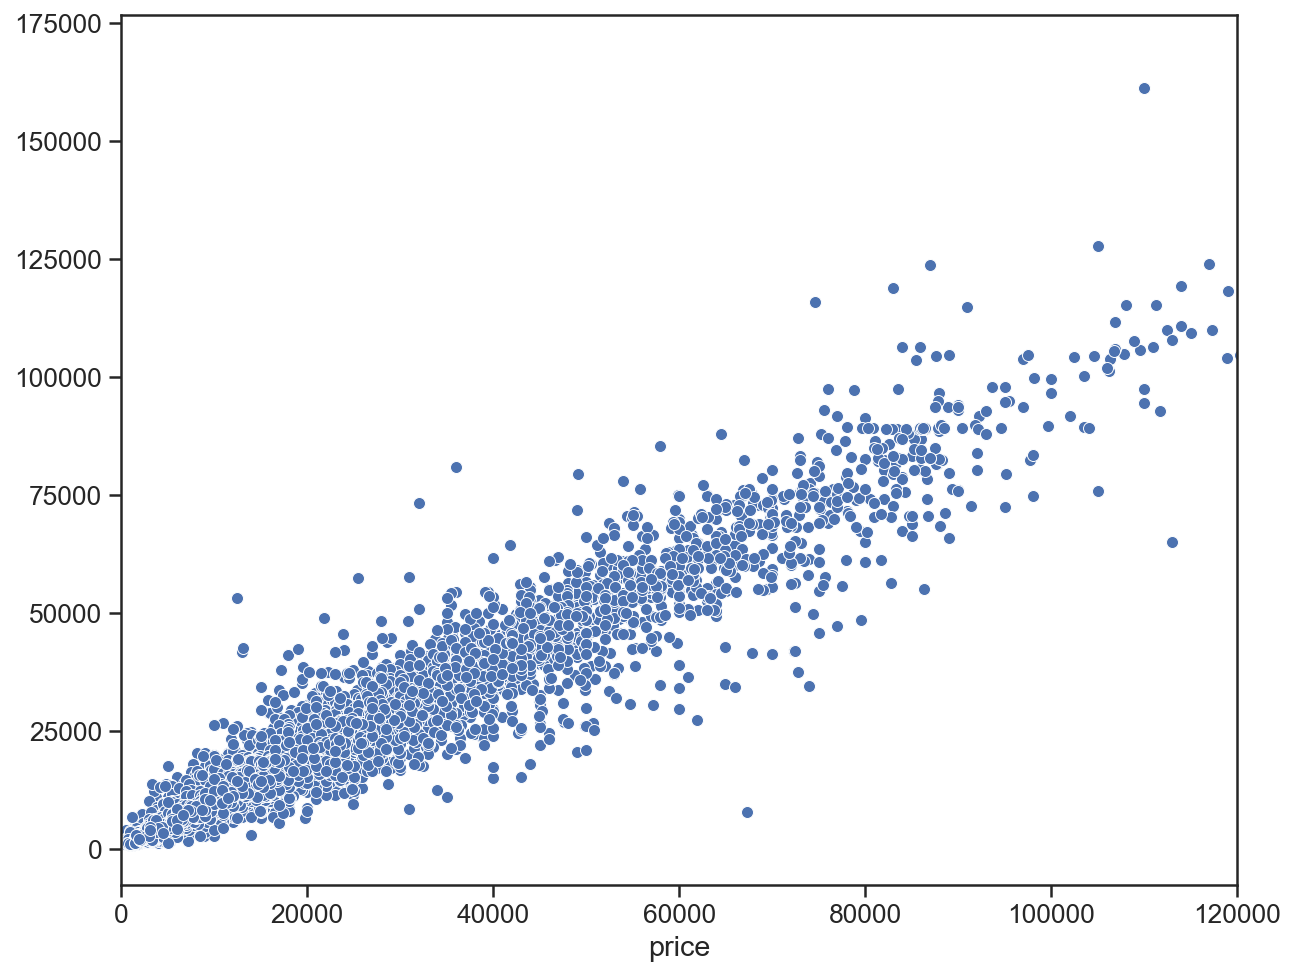

In [345]:
ax = sns.scatterplot(x=y3_fi_test, y=rfr.predict(X3_fi_test))
ax.set_xlim(0,120000)

The above graph plot the true test values against the predicted test value. Most of the plotted points are closer to the diagnol axis which suggests that the difference between the true price and the predicted price is small. The scatter points cluttered over the diagnol axis indicates the good prediction of the model. The graph also showcases many scattered points which are the wrongly predicted data or the data having high varience from the actual value. This heteroskedastic prediction might be because of the overstated statistical significance of the independent variables.

### Analysis of invidual prediction & dist of scores/losses
This section dives into individual predictions made by the regression model. We'll analyze the distribution of scores (predicted values) and losses (differences between predicted and actual values). This helps assess the model's accuracy and identify potential areas for improvement.

In [346]:
y3_fi_pred = pd.DataFrame(rfr.predict(X3_fi_test), index=X3_fi_test.index, columns=['y_pred'])
y3_fi_pred.head()

,y_pred
80072,9267.04
257733,15185.99
10903,4126.77
286728,8571.07
102783,26445.12


In [348]:
true_pred_df = pd.concat([X3_fi_test, y3_fi_test.rename('y_test'), y3_fi_pred], axis=1)
len(true_pred_df)

24108

In [349]:
len(true_pred_df.query("y_test != y_pred"))

24106

Lets calculate the varience of predictions for each records.

In [350]:
var = pd.DataFrame((np.abs(true_pred_df['y_test']-true_pred_df['y_pred'])), index=true_pred_df.index, columns=['var'])
var.head()

,var
80072,4232.96
257733,2385.99
10903,27.77
286728,1576.07
102783,1455.12


In [ ]:
true_pred_df = pd.concat([true_pred_df, var],axis=1)
true_pred_df['var'].describe()

count     24108.000000
mean       1907.523083
std        3043.887488
min           0.000000
25%         464.295000
50%        1081.530000
75%        2286.395000
max      117384.050000
Name: var, dtype: float64

The mean variation in the predicted price is  1907 for the test data which is of count 24108. The standard deviation in the predicted price is 3043.

# Conclusion

This machine learning project was started with the aim of building a suitable machine learning model to predict the price of the cars using the sales adverts dataset.Various analysis were conducted on the data and three regression model where used to test the data.
<br>Knn Regressor
<br>Decision Tree Regressor
<br>Random Forest regressor
<br>The reg_code, public_reference and the crossover_car_and_van features were avoided from the dataset as there was no established direct relationship of these columns from the dataset.One hot encoding was done for the Vehicle_condition, fuel_type features and categoreical encoding was done for the standard_make, body_type features. Label encoding was done for the standard_model and standard_colour columns.

<br>The model was built analysed and evaluated with a subset of the data from the adverts dataset. out of the three regression models the Random forest regressor has given the best score of 0.93.From the grid search analysis it was found out that the maximum depth of 16 gives the best score for the decision tree regressor. But this maximum score of 0.91 was still less than the random forest regressor score of 0.93.
<br>Knn regressor was also subjectted for the analysis of underfit or overfit tradeoff. It was found out that the neighbour value of 7 gives the best score for the knn regressor. But the knn regressor gives the least score for this dataset compared to the other two models.
<br>As the random forest regressor is the model which gave the best score which is 0.93 out of the three this model was selected for further analysis. The residual loss was calculated and plotted for the records in the test data. The histogram plotted for the residual loss indicated that the loss for the most of the predictions are close to the zero value. 
<br>The cross validation carried out with 5 different folds has given out an average score of 0.89 and also indicated that the variation in the model scores while considering each folds as test data is relatively less.After this the feature importance check was run and the result indicated that the colour and the vehicle_condition column can be avoided from the dataset without affecting the model score.
<br>The true vs predicted plot were also plotted to see the correctness of the predicted data. The varience of the predicted values from the true values were also calculated. The mean varience came out 1907with a standard deviation of 3043.

From the analysis of various models and details the random forest regressor best suits the data with a model score of 0.93